In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [25]:
transform = transforms.ToTensor()
mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
data_loader = torch.utils.data.DataLoader(dataset=mnist_data, batch_size=64, shuffle=True)

In [26]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        # Encoder layer whose main motive will be
        # compress down to 784 pixels (28 x 28) down to 64 features

        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64)
        )

        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 28 * 28),
            nn.Sigmoid()  # Output between 0 and 1
        )
    

    def forward(self, x):
        x = x.view(x.size(0), -1)
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)

        # reshaping back to image format
        decoded = decoded.view(decoded.size(0), 1, 28, 28)
        return decoded

# Mean Squared Error loss imported here

$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

how this affects the affects our AE ?? 

the mse loss function measures the average squared difference b/w the orignal input and the reconstructed output
- stores important features during reconstruction
- minimizing pixel wise difference especially for the images

helps as this is sensitive to large errors coz squaring filters them out. 

In [27]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoEncoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

training logic here, will be using the mse loss and adam optimizer

In [28]:
def train_autoencoder(model, data_loader, criterion, optimizer, epochs=10):
    model.train()
    train_losses = []


    for epoch in range(epochs):
        running_loss = 0.00
        for batch_idx, (data, _) in enumerate(data_loader):
            data = data.to(device)

            ## forward pass logic here 
            # in forward pass we are basically 
            # passing the 
            optimizer.zero_grad()
            reconstructed = model(data)
            loss = criterion(reconstructed, data)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            if batch_idx % 100 == 0:
                print(f"Epoch [{epoch + 1} / {epochs}], Batch [{batch_idx}], Loss : {loss.item():.4f}")


        epoch_loss = running_loss / len(data_loader)
        train_losses.append(epoch_loss)

        print(f'Epoch [{epoch + 1}/{epochs}] Average Loss : {epoch_loss:.4f}')


    return train_losses           

Starting training...
Epoch [1 / 10], Batch [0], Loss : 0.2318
Epoch [1 / 10], Batch [100], Loss : 0.0637
Epoch [1 / 10], Batch [200], Loss : 0.0567
Epoch [1 / 10], Batch [300], Loss : 0.0483
Epoch [1 / 10], Batch [400], Loss : 0.0375
Epoch [1 / 10], Batch [500], Loss : 0.0346
Epoch [1 / 10], Batch [600], Loss : 0.0348
Epoch [1 / 10], Batch [700], Loss : 0.0300
Epoch [1 / 10], Batch [800], Loss : 0.0253
Epoch [1 / 10], Batch [900], Loss : 0.0247
Epoch [1/10] Average Loss : 0.0429
Epoch [2 / 10], Batch [0], Loss : 0.0285
Epoch [2 / 10], Batch [100], Loss : 0.0248
Epoch [2 / 10], Batch [200], Loss : 0.0282
Epoch [2 / 10], Batch [300], Loss : 0.0228
Epoch [2 / 10], Batch [400], Loss : 0.0228
Epoch [2 / 10], Batch [500], Loss : 0.0210
Epoch [2 / 10], Batch [600], Loss : 0.0232
Epoch [2 / 10], Batch [700], Loss : 0.0218
Epoch [2 / 10], Batch [800], Loss : 0.0203
Epoch [2 / 10], Batch [900], Loss : 0.0175
Epoch [2/10] Average Loss : 0.0224
Epoch [3 / 10], Batch [0], Loss : 0.0189
Epoch [3 / 1

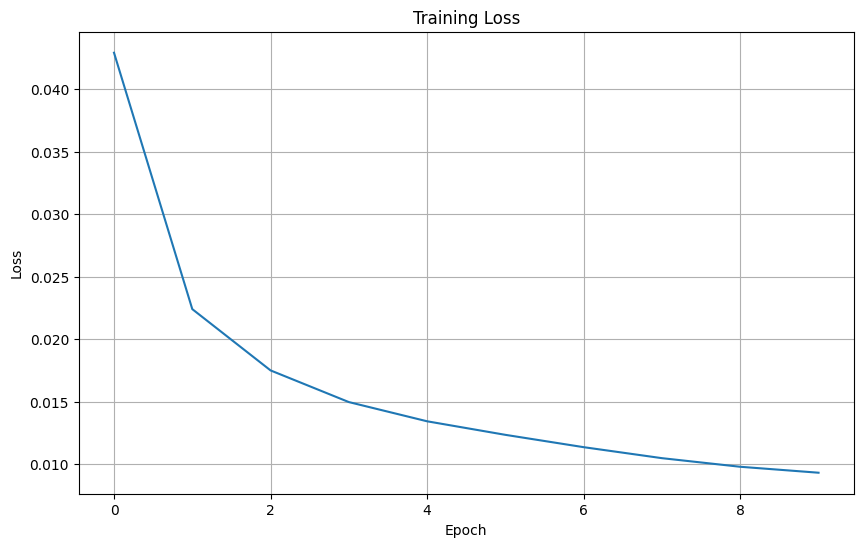

Visualizing reconstructions...


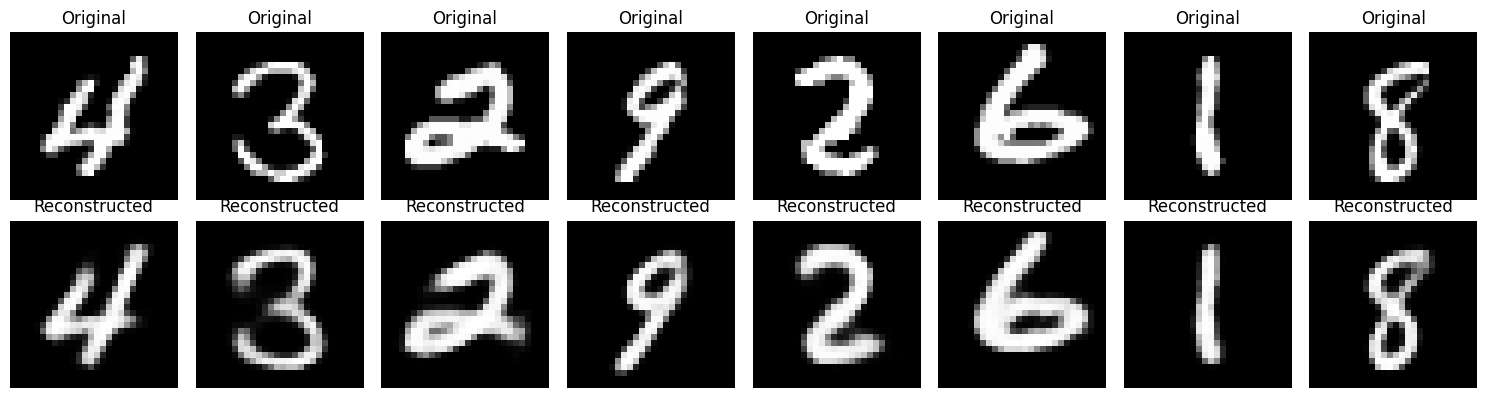

In [29]:
def visualize_reconstruction(model, data_loader, num_images=8):
    model.eval()
    with torch.no_grad():
        data_iter = iter(data_loader)
        images, _ = next(data_iter)
        images = images[:num_images].to(device)

        reconstructed = model(images)
        images = images.cpu()
        reconstructed = reconstructed.cpu()

        fig, axes = plt.subplots(2, num_images, figsize=(15, 4))

        for i in range(num_images):
            # Original images
            axes[0, i].imshow(images[i].squeeze(), cmap='gray')
            axes[0, i].set_title('Original')
            axes[0, i].axis('off')
            
            # Reconstructed images
            axes[1, i].imshow(reconstructed[i].squeeze(), cmap='gray')
            axes[1, i].set_title('Reconstructed')
            axes[1, i].axis('off')
        
        plt.tight_layout()
        plt.show()

    
print("Starting training...")
train_losses = train_autoencoder(model, data_loader, criterion, optimizer, epochs=10)

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Visualize reconstructions
print("Visualizing reconstructions...")
visualize_reconstruction(model, data_loader)
